In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

In [4]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

# Introduction

This chapter is light but contains some important definitions. The identity matrix and the inverse of a matrix are concepts that will be very useful in subsequent chapters. 

Using these concepts, we will see how vectors and matrices can be transformed. To fully understand the intuition behind these operations, we'll take a look at the geometric intrepreation of linear algebra. This will help us visualize otherwise abstract operatins.

Then, at the end of this chapter, we'll use the concepts of matrix inversion and the identity matrix to solve a simple system of linear equations! Once you see this approach, you'll never want to use the algebraic methods of substitution or elimination that you learned in high school!

# 3.3 Identity and Inverse Matrices

# Identity matrices

The identity matrix $\bs{I}_n$ is a special matrix of shape ($n \times n$) that is filled with $0$ except for the diagonal, which is filled with $1$.

<img src="images/identity-matrix.png" width="150" alt="Example of an identity matrix" title="Identity matrix">
<em>A 3 by 3 identity matrix</em>

More generally,
$$I_1 = \begin{bmatrix}
1 \end{bmatrix}
,\ 
I_2 = \begin{bmatrix}
1 & 0 \\
0 & 1 \end{bmatrix}
,\ 
I_3 = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \end{bmatrix}
,\ \cdots ,\ 
I_n = \begin{bmatrix}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1 \end{bmatrix}$$

An identity matrix can be created with the Numpy function `eye()`:

In [5]:
np.eye(3) # 3 rows, and 3 columns

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

When you "apply" the identity matrix to a vector using the dot product, the result is the same vector:

$$\bs{I}_n\bs{x} = \bs{x}$$

### Example 1

$$
\begin{bmatrix}
    1 & 0 & 0 \\\\
    0 & 1 & 0 \\\\
    0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}=
\begin{bmatrix}
    1 \times x_1 + 0 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 1 \times x_2 + 0\times x_3 \\\\
    0 \times x_1 + 0 \times x_2 + 1\times x_3
\end{bmatrix}=
\begin{bmatrix}
    x_{1} \\\\
    x_{2} \\\\
    x_{3}
\end{bmatrix}
$$

Hence, the name **identity** matrix.

In [6]:
x = np.array([[2], [6], [3]])
x

array([[2],
       [6],
       [3]])

In [7]:
x_id = np.eye(x.shape[0]).dot(x)
x_id

array([[ 2.],
       [ 6.],
       [ 3.]])

More generally, when $\bs{A}$ is an $m\times n$ matrix, it is a property of matrix multiplication that:

$$I_m\bs{A} = \bs{A}I_n = \bs{A}$$

## Visualizing the intuition
Vectors and matrices occupy $n$-dimensional space. This precept allows us to think about linear algebra geometrically and, if we're lucky enough to be working with $<3$ dimensions, visually. 

For example, if you had a $2$-dimensional vector $\bs{v}$, you could think of the vector as an ordered pair of real numbers ($a,b$). This ordered pair could then be plotted in a Cartesian coordinate system with a line connecting it to the origin:

<img src="images/vector_line.png" height = 300 width = 300>

If you had two such vectors ($\bs{v}$ and $\bs{w}$), a simple vector operation like addition would geometrically look like this:

<img src="images/vector_addition.png" height = 300 width = 300>

Mathematically, that addition looks like this:

<img src="images/vector_addition_math.png" height = 300 width = 300>

Now that we've got you thinking about linear algebra geometrically, consider the identity matrix. If you multiply a vector by the identity matrix, you're technically applying a **transformation** to that vector. But since your multiplier was the identity matrix $\bs{I}$, the transformation just outputs the multiplicand, $\bs{x}$, itself. That's what happened above when we saw that $\bs{x}$ was not altered after being multiplied by $\bs{I}$. Visually, nothing would happen to your line.

But what if we slightly change our identity matrix? What if, for example, we change the $1$'s to $2$'s like so:

$$
\begin{bmatrix}
    2 & 0 & 0 \\\\
    0 & 2 & 0 \\\\
    0 & 0 & 2
\end{bmatrix}
$$

That would double each element in vector $\bs{x}$. Visually, that would make the line twice as long.

The takeaway here is that you can define an **operation matrix** to transform vectors. Here’s a few examples of the types of transformations you could do:
 - Scale: make all inputs bigger/smaller
 - Skew: make certain inputs bigger/smaller
 - Flip: make inputs negative
 - Rotate: make new coordinates based on old ones (e.g. East becomes North, North becomes West, etc.)
In short, all of these are geometric interpretations of multiplication. Each of them provides a means to warp a vector space.

# Inverse Matrices
If you have a square matrix (i.e. a matrix with the same number of columns and rows) then you can calculate the inverse of that matrix so long as its [determinant](https://en.wikipedia.org/wiki/Determinant) doesn't equal 0 (more on the determinant in a later lesson!).

The inverse of $\bs{A}$ is denoted $\bs{A}^{-1}$. It is the matrix that results in the identity matrix when it is multiplied by $\bs{A}$:

$$\bs{A}^{-1}\bs{A}=\bs{I}_n$$

This means that if we apply a linear transformation to the space with $\bs{A}$, it is possible to go back with $\bs{A}^{-1}$. It provides a way to cancel the transformation.

### Example 2

$$
\bs{A}=\begin{bmatrix}
    3 & 0 & 2 \\\\
    2 & 0 & -2 \\\\
    0 & 1 & 1
\end{bmatrix}
$$

For this example, we will use the numpy function `linalg.inv()` to calculate the inverse of $\bs{A}$. Let's start by creating $\bs{A}$. If you want to learn about the nitty gritty details behind this operation, check out [this](https://www.mathsisfun.com/algebra/matrix-inverse-minors-cofactors-adjugate.html) or [this](https://www.mathsisfun.com/algebra/matrix-inverse-row-operations-gauss-jordan.html).

In [8]:
A = np.array([[3, 0, 2], [2, 0, -2], [0, 1, 1]])
A

array([[ 3,  0,  2],
       [ 2,  0, -2],
       [ 0,  1,  1]])

Now we calculate its inverse:

In [9]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.2,  0.2,  0. ],
       [-0.2,  0.3,  1. ],
       [ 0.2, -0.3, -0. ]])

We can check that $\bs{A^{-1}}$ is the inverse of $\bs{A}$ with Python:

In [10]:
A_bis = A_inv.dot(A)
A_bis

array([[ 1.,  0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

# Sovling a system of linear equations
The inverse matrix can be used to solve the equation $\bs{Ax}=\bs{b}$ by adding it to each term:

$$\bs{A}^{-1}\bs{Ax}=\bs{A}^{-1}\bs{b}$$

Since we know by definition that $\bs{A}^{-1}\bs{A}=\bs{I}$, we have:

$$\bs{I}_n\bs{x}=\bs{A}^{-1}\bs{b}$$

We saw that a vector is not changed when multiplied by the identity matrix. So we can write:

$$\bs{x}=\bs{A}^{-1}\bs{b}$$

This is great because we now have our vector of variables $\bs{x}$ all by itself on the right side of the equation! This means we can solve for $\bs{x}$ by simply computing the dot product of $\bs{A^-1}$ and $\bs{b}$!

Let's try that!

### Example 3

We will take a simple solvable example:

$$
\begin{cases}
y = 2x \\\\
y = -x +3
\end{cases}
$$

First, lets be sure we're using the notation we saw in above:

$$
\begin{cases}
A_{1,1}x_1 + A_{1,2}x_2 = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2= b_2
\end{cases}
$$

Here, $x_1$ corresponds to $x$ and $x_2$ corresponds to $y$. So we have:

$$
\begin{cases}
2x_1 - x_2 = 0 \\\\
x_1 + x_2= 3
\end{cases}
$$

Our matrix $\bs{A}$ of weights is:

$$
\bs{A}=
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
$$

And the vector $\bs{b}$ containing the solutions of individual equations is:

$$
\bs{b}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Under the matrix form, our systems becomes:

$$
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Let's define $\bs{A}$:

In [11]:
A = np.array([[2, -1], [1, 1]])
A

array([[ 2, -1],
       [ 1,  1]])

And let's define $\bs{b}$:

In [13]:
b = np.array([[0], [3]])

And now let's find the inverse of $\bs{A}$:

In [14]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

Since we saw that

$$\bs{x}=\bs{A}^{-1}\bs{b}$$

We have:

In [15]:
x = A_inv.dot(b)
x

array([[ 1.],
       [ 2.]])

This is our solution! 

$$
\bs{x}=
\begin{bmatrix}
    1 \\\\
    2
\end{bmatrix}
$$

Going back to the geometric interpretion of linear algebra, you can think of our solution vector $\bs{x}$ as containing a set of coordinates ($1, 2$). This point in a $2$-dimensional Cartesian plane is actually the intersection of the two lines representing the equations! 

Let's plot this to visually check the solution:

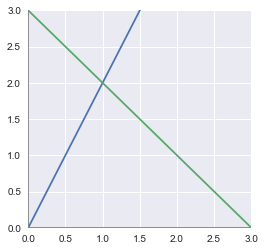

In [17]:
#to draw the equation with Matplotlib, first create a vector with some x values
x = np.arange(-10, 10)
#then create some y values for each of those x values using the equation
y = 2*x
y1 = -x + 3

#then instantiate the plot figure
plt.figure()
#draw the first line
plt.plot(x, y)
#draw the second line
plt.plot(x, y1)
#set the limits of the axes
plt.xlim(0, 3)
plt.ylim(0, 3)

#draw the axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

We can see that the intersection of the two lines (where $x=1$ and $y=2$) is the solution to our system of equations!

# What's next?
This lesson introduced a simple case where our system of equations had one and only one solution. The next lesson will treat systems of linear equations that have a number of solutions.